<a href="https://colab.research.google.com/github/schuylerdare96/ML-AI-Data-Science-Projects/blob/master/Heart_disease_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart-disease.csv")
df.shape

(303, 14)

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

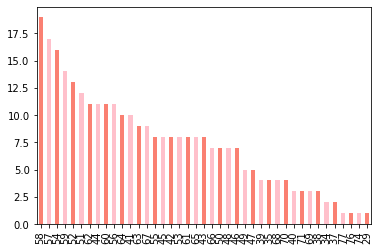

In [7]:
df["age"].value_counts().plot(kind="bar",color=["salmon","pink"])

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

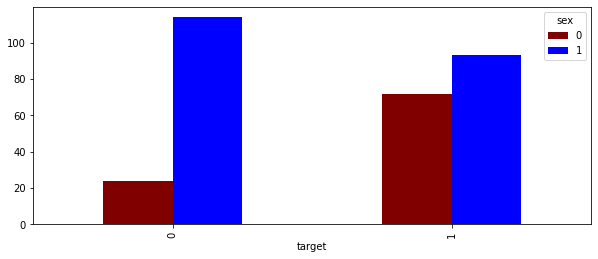

In [9]:
df.describe()

pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,4),color=["maroon","blue"]);

In [10]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

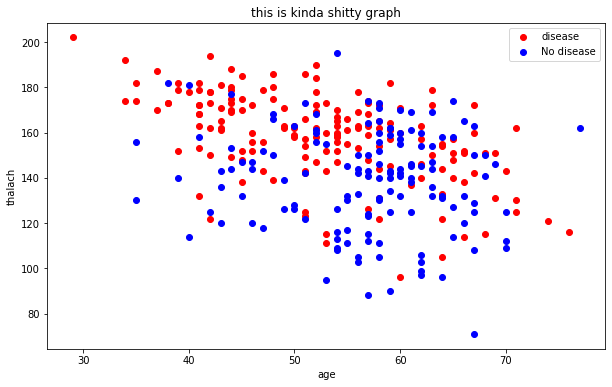

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
          df.thalach[df.target==1],c="red");

plt.scatter(df.age[df.target==0],
          df.thalach[df.target==0],c="blue");

plt.title("this is kinda shitty graph")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["disease","No disease"])

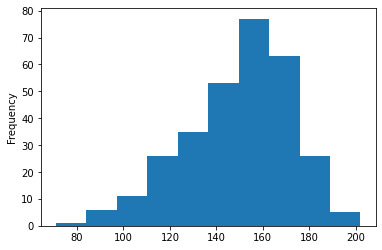

In [12]:
df.thalach.plot.hist()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


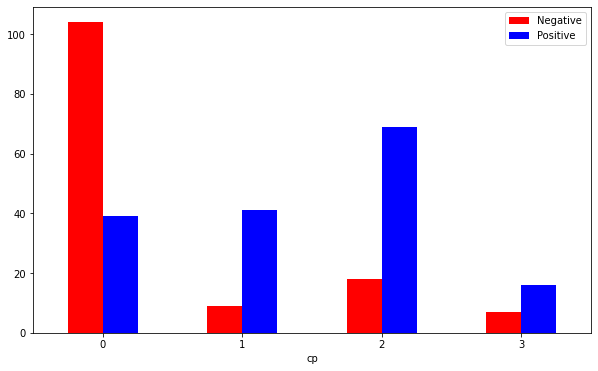

In [13]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["Red","blue"])
plt.xticks(rotation=0)
plt.legend(["Negative","Positive"])
df.corr()

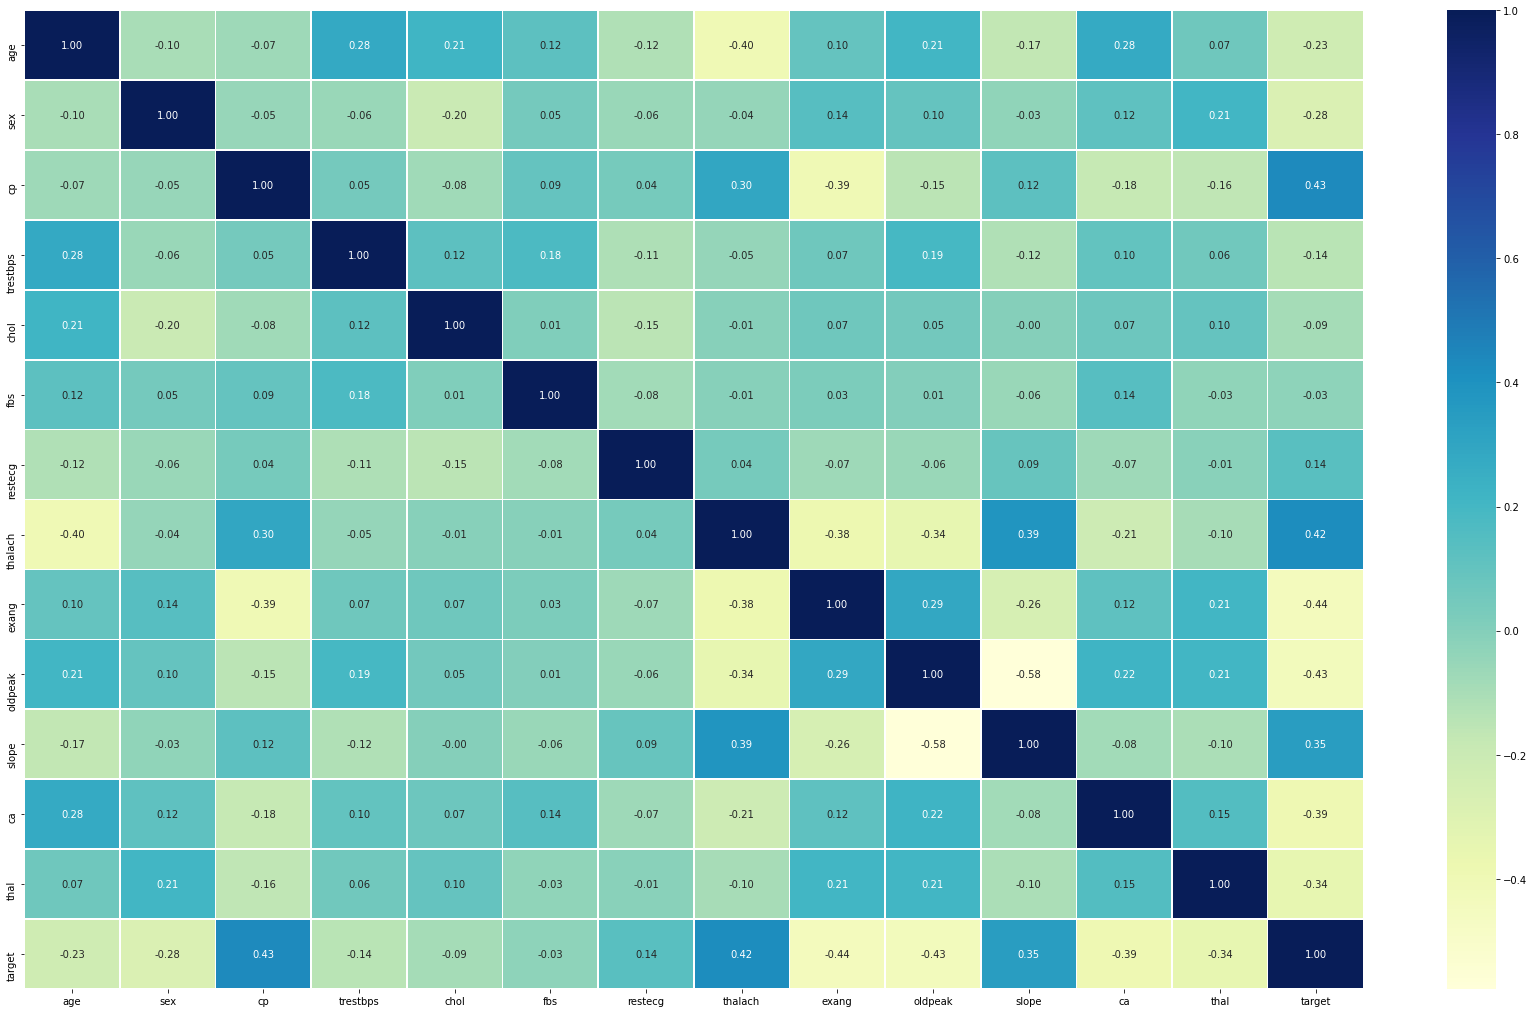

In [14]:
cm=df.corr()
fig,ax=plt.subplots(figsize=(30,18))
ax=sns.heatmap(cm,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

In [0]:
X=df.drop("target",axis=1)
y=df["target"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
X_train.head()
X_test.head()
y_train.head()

77     1
117    1
124    1
237    0
122    1
Name: target, dtype: int64

In [0]:

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_score(models,X_train,X_test,y_train,y_test):
    
    """
    This function trains and tests data on the train and test set provided to it.
    
    """
    np.random.seed(69)
    
    model_scores={}
    #name:key, model:value in models dictionary
    for name, model in models.items():
        model.fit(X_train,y_train)
        #creates a key as 'name' & value as 'model' in model_scores dict
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores

In [18]:
model_scores = fit_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8688524590163934}

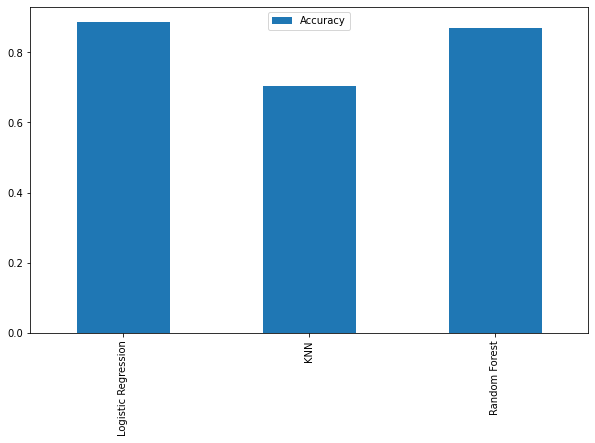

In [19]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10,6));

In [0]:
train_scores=[]
test_scores=[]

neighbors=range(1,100)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    


In [21]:
test_scores

print(f"maximum value of test scores is {(max(test_scores))*100}%")

maximum value of test scores is 75.40983606557377%


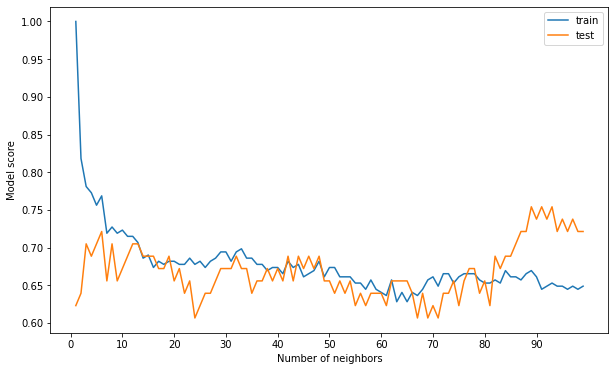

In [22]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_scores, label="Train score");

plt.plot(neighbors, test_scores, label="Test score");
plt.xticks(np.arange(0, 100, 10))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend(["train","test"])


In [0]:
# creates a grid for Logistic Regression
lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}

# creates a grid for RandomisedforestClassifier

rf_grid= {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

#np.arange works same as range()

In [24]:
np.random.seed(69)

rs_lg=RandomizedSearchCV(LogisticRegression(),
                        param_distributions=lr_grid,
                        cv=8,
                        n_iter=20,
                        verbose=True)
rs_lg.fit(X_train,y_train)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.7s finished


RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [25]:
rs_lg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [26]:
rs_lg.score(X_test, y_test)

0.8852459016393442

In [27]:
# tuning RandomForestClassifier

np.random.seed(42)


rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [28]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 16,
 'n_estimators': 260}

In [29]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [30]:
## using GridSearchCV

lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}
 
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=lr_grid, # param_distributions in ramdomizedsearchcv
                         cv=10,
                         verbose=False)

gs_log_reg.fit(X_test,y_test)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2....
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [31]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

In [33]:
y_preds=gs_log_reg.predict(X_test)
y_preds


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

<Figure size 7200x432 with 0 Axes>

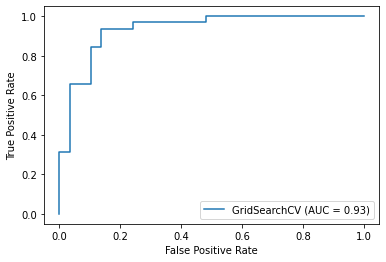

In [34]:
plt.figure(figsize=(100,6));
plot_roc_curve(gs_log_reg,X_test,y_test);

In [35]:
cm=confusion_matrix(y_test,y_preds)
cm

array([[25,  4],
       [ 2, 30]])

Text(13.5, 0.5, 'Predicted label')

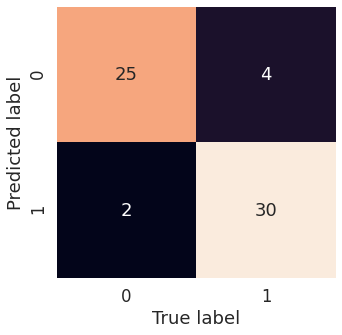

In [36]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusion_matrix(y_test,y_preds),
              annot=True,
              cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")


In [37]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [38]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8479781420765027

In [39]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [40]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=cv_precision.mean()
cv_precision

0.8215873015873015

In [41]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.9272727272727274

In [42]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8705403543192143

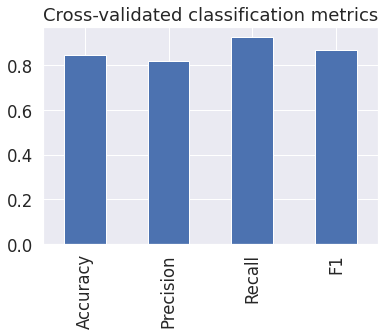

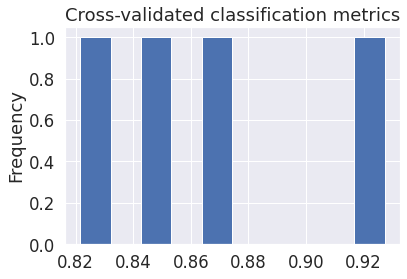

In [43]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);


cv_metrics.T.plot.hist(title="Cross-validated classification metrics",
                      legend=False);

In [44]:
clf=LogisticRegression(C=0.23357214690901212, solver='liblinear')

clf.fit(X_train,y_train)

clf.coef_

array([[ 0.00799164, -0.92969665,  0.70542339, -0.01621254, -0.00257491,
        -0.01285023,  0.33563684,  0.02813543, -0.48645092, -0.52771179,
         0.33256821, -0.65146505, -0.60553138]])

In [45]:
clf.score(X_test,y_test)

0.8852459016393442

In [46]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [47]:
y_test

213    0
243    0
291    0
232    0
15     1
      ..
118    1
133    1
204    0
18     1
279    0
Name: target, Length: 61, dtype: int64

In [48]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.007991643291247196,
 'ca': -0.6514650491798142,
 'chol': -0.0025749139113312065,
 'cp': 0.70542338868793,
 'exang': -0.4864509189877638,
 'fbs': -0.012850227680968777,
 'oldpeak': -0.5277117895267822,
 'restecg': 0.33563683522610754,
 'sex': -0.9296966508636174,
 'slope': 0.3325682094363076,
 'thal': -0.6055313779530076,
 'thalach': 0.028135427171513915,
 'trestbps': -0.016212538535673317}

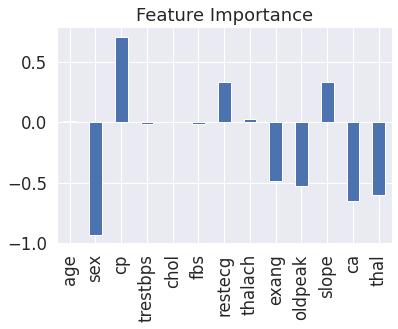

In [49]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);